# Operaciones básicas sobre el conjunto de datos
### - Separación
Creación de los conjuntos de entrenamieto, validación y test
### - Escalado
Unificación de todos los atributos al mismo intervalo
### - Visualización

---

    [ES] Código de Alfredo Cuesta Infante para 'Reconocimiento de Patrones'
       @ Master Universitario en Visión Artificial, 2020, URJC (España)
    [EN] Code by Alfredo Cuesta-Infante for 'Pattern Recognition'
       @ Master of Computer Vision, 2020, URJC (Spain)

    alfredo.cuesta@urjc.es

In [6]:
import numpy  as np
import pandas as pd
from matplotlib import pyplot as plt

In [7]:
def main():

    theta = 0.5              #<- parameter for feature engineering
    fraction_Test = 0.2      #<- Percentage of the dataset held for test, in [0,1]
    fraction_Valid= 0.2      #<- Percentage of the train set held for validation, in [0,1]
    instance_ID_to_show = 639  #<- index of the instance of 0 and 1 that will be shown in a figure
    np.random.seed(seed=123) #<- to force that every run produces the same outcome
                             #    (comment, or remove, to get randomness)

    # --- Get data -------------------------------------
    FullSet_0 = pd.read_csv('../../Datasets/1000ceros.csv', header=None)
    FullSet_1 = pd.read_csv('../../Datasets/1000unos.csv',  header=None)

    # --- Separate Test set -----------------------------
    TrainSet_0, TestSet_0 = split_train_test(FullSet_0, fraction_Test)
    TrainSet_1, TestSet_1 = split_train_test(FullSet_1, fraction_Test)

    # --- Separate Validation set -----------------------
    TrainSet_0, ValidSet_0 = split_train_test(TrainSet_0, fraction_Valid)
    TrainSet_1, ValidSet_1 = split_train_test(TrainSet_1, fraction_Valid)
    
    # --- Scale the Train set ---------------------------
    #TrainSet_0 = scale_to_unit(TrainSet_0)
    #TrainSet_1 = scale_to_unit(TrainSet_1)
    TrainSet_0 = scale_to_unit(TrainSet_0, TrainSet_0.max(), TrainSet_0.min())
    TrainSet_1 = scale_to_unit(TrainSet_1, TrainSet_1.max(), TrainSet_1.min())
    
    # --- Print shape -----------------------------------
    print(TrainSet_0.shape)
    print(TrainSet_1.shape)
    
    # --- Plot the whole Data Sets
    f1, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.imshow(TrainSet_0,cmap='Blues')
    ax2.imshow(TrainSet_1,cmap='Blues')
    #--> 2 figures in which each row is a row of the dataset
    
    # --- Plot an instance of ZERO
    f2, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
    instance_0 = TrainSet_0.iloc[instance_ID_to_show].values
    ax1.imshow(np.reshape(instance_0,[28,28]), 'Blues')
    # --- Plot an instance of ONE
    instance_1 = TrainSet_1.iloc[[instance_ID_to_show]].values
    ax2.imshow(np.reshape(instance_1,[28,28]), 'Blues')
    #--> one figure with the selected instance of 0 and the other with the selected instance of 1
    
    plt.show(f1)
    plt.show(f2)

In [8]:
def split_train_test(data, test_ratio):
    # data is the complete dataframe
    # test_ratio is in [0,1], and represents the percentage of the dataframe held for testing
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    train_set = data.iloc[train_indices]
    test_set  = data.iloc[test_indices]
    return train_set.reset_index(drop=True), test_set.reset_index(drop=True)

In [9]:
def scale_to_unit(data, maxColumns, minColumns):
    # Since all the pixels are in [0,255] we know the max and min for every possible pixel
    # --> so we can scale all the data at the same time
    # Usually we have to learn the max and min of the training set and save it to scale wrt them
    # data = (data / 255.0)
    data = (data - minColumns) / (maxColumns - minColumns)
    return data

(640, 784)
(640, 784)


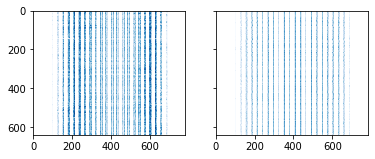

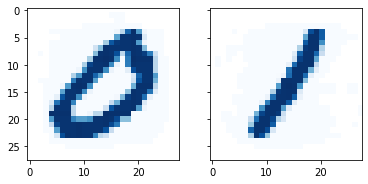

In [10]:
main()

#### Ejercicio. 

Modificar el main para que muestre la imagen del 0 y del 1 número 800. 

+ Si da error explicar por qué. **No hay disponibles tantas muestras.** 
+ Averiguar cual es el mayor índice de la imagen del 0 y del 1 que podemos mostrar. **Hay un total de 640, por lo que el último índice es 639.**<br>
    <u>*AYUDA*</u>: añadir un **print** dentro de **main** para ver la información que necesitas

#### Ejercicio. 
Modificar la funcion **Scale_to_unit** para que reciba

+ un dataframe
+ un vector con el valor máximo de cada columna
+ un vector con el valor mínimo de cada columna

y devuelva un dataframe donde cada columna está escalada al [0,1]. 

Después modifica el resto del código para que vuelva a funcionar correctamente todo.